# Convolutional Neural Networks for Image Analysis

## Vivian Zeng
### 1) Download and fetch the data with the following Python code
Select an image from this dataset and display it (Hint: Use the plt.cm.gray color map with plt.imshow function). 

In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.images
y = faces.target.reshape(-1, 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

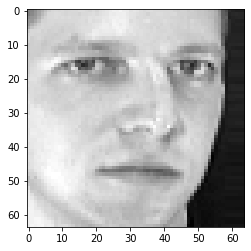

In [4]:
plt.imshow(X[1], plt.cm.gray)

### 2) Setup training and testing sets. Use a 50/50 split for each class (5 training images and 5 test images per person). Print the dimension of each of the feature (image) matrices. Because this is a small dataset, we will also use the test set for validation. (5 pts)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, stratify=y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(200, 64, 64) (200, 64, 64) (200, 1) (200, 1)


### 3) Convert the vector of response variables to a matrix with 40 columns, with indicators for which person it is (one-hot encoded vectors). Print the dimensions of the new response vectors. (5 pts)

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(200, 40) (200, 40)


### 4)Reshape the image arrays so that they have 4 dimensions: (number of images, width of image, height of image, number of channels). For example, the array of training images should be (200, 64, 64, 1). Print the dimensions of the new image arrays. (5 pts)

In [8]:
X_train = X_train.reshape(200, 64, 64, 1)
X_test = X_test.reshape(200, 64, 64, 1)
print(X_train.shape, X_test.shape)

(200, 64, 64, 1) (200, 64, 64, 1)


### 5) Fit a convolutional neural network using the following architecture, and print the output from training. (15 pts)
1 convolutional layer with:
16 filters (neurons),
a window size of 3,
stride size of 1,
ReLU activation function,
padding so that the feature is the same size as the original image

1 max pooling layer with:
window size of 2,
stride size of 2,
no padding,

1 fully connected output layer with:
40 nodes for each face to predict,
softmax activation function

For training, use the Adam optimizer, 20 epochs, a batch size of 10, and the categorical cross entropy loss function.

In [70]:
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=3, activation='relu',
                 padding='same', input_shape=(64,64,1)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model1.add(Flatten())
model1.add(Dense(40, activation='softmax'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                655400    
Total params: 655,560
Trainable params: 655,560
Non-trainable params: 0
_________________________________________________________________


In [71]:
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model1.fit(X_train, y_train,
           epochs=20, batch_size=10,
           validation_data=(X_test, y_test))

Train on 200 samples, validate on 200 samples
Epoch 1/20
200/200 [==============================] - 1s 4ms/sample - loss: 5.2833 - accuracy: 0.0050 - val_loss: 4.2822 - val_accuracy: 0.0150
Epoch 2/20
200/200 [==============================] - 0s 2ms/sample - loss: 3.9963 - accuracy: 0.0600 - val_loss: 3.4644 - val_accuracy: 0.2350
Epoch 3/20
200/200 [==============================] - 0s 2ms/sample - loss: 3.3860 - accuracy: 0.2200 - val_loss: 3.1830 - val_accuracy: 0.4450
Epoch 4/20
200/200 [==============================] - 0s 2ms/sample - loss: 2.7912 - accuracy: 0.5400 - val_loss: 2.6119 - val_accuracy: 0.7150
Epoch 5/20
200/200 [==============================] - 0s 2ms/sample - loss: 2.0863 - accuracy: 0.7800 - val_loss: 2.1267 - val_accuracy: 0.7550
Epoch 6/20
200/200 [==============================] - 0s 2ms/sample - loss: 1.4624 - accuracy: 0.8400 - val_loss: 1.6886 - val_accuracy: 0.7150
Epoch 7/20
200/200 [==============================] - 0s 2ms/sample - loss: 0.9369 - accur

### 6) Print the accuracy on the test set. (5 pts)

In [72]:
 model1.evaluate(X_test, y_test)

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.32020604372024536, 0.935]

### 7) Pick one of the images from the test set, and print the image. (5 pts)

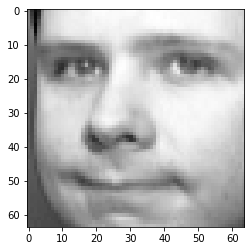

In [73]:
img_index = 0
example = X_test[img_index, :, :, 0].reshape(64, 64)
plt.imshow(example, plt.cm.gray)

### 8) For the image you selected in (7), print the images of the feature maps from both the convolutional and pooling layers. (10 pts)

Compute the feature maps by passing the example image through the network, and getting the output from the layers. 

In [74]:
layer_outputs = [layer.output for layer in model1.layers]
layers_model = keras.Model(inputs=model1.input, outputs=layer_outputs)
outputs = layers_model.predict(example.reshape(1, 64, 64, 1))
conv_output = outputs[0]
pooling_output = outputs[1]

In [75]:
conv_output.shape

(1, 64, 64, 16)

In [76]:
pooling_output.shape

(1, 32, 32, 16)

In [77]:
outputs[0].shape 

(1, 64, 64, 16)

In [78]:
outputs[1].shape

(1, 32, 32, 16)

In [79]:
outputs[2].shape

(1, 16384)

Plot the feature maps from the convolutional and pooling layers.

In [99]:
def FeatureMaps(outputs):
    n_col = 4
    n_row = int(outputs.shape[3] / n_col) 
    plt.figure(figsize=(2*n_col, 2*n_row))
    for j in range(n_row * n_col):
        plt.subplot(n_row, n_col, j + 1)
        plt.imshow(outputs[0, :, :, j], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
plt.show 
return None

SyntaxError: 'return' outside function (<ipython-input-99-3666c11aee9d>, line 11)

feature maps from both the convolutional layers.

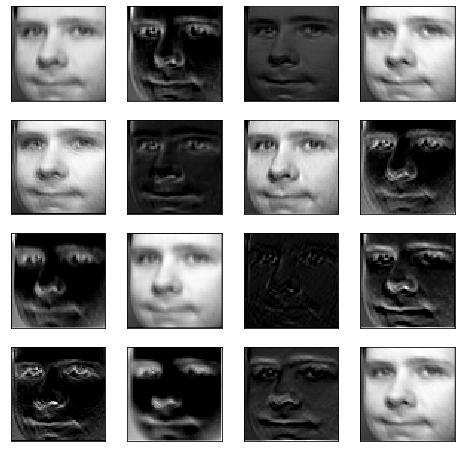

In [81]:
 FeatureMaps(conv_output)

feature maps from both the pooling layers.

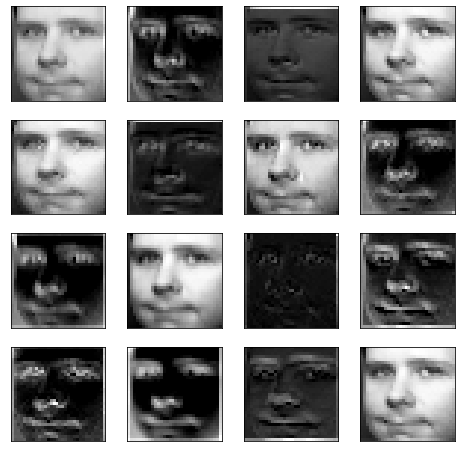

In [82]:
FeatureMaps(pooling_output)

### 9) Fit the model from (5) again, but this time use a window size of 9 for the convolution layer. Print the accuracy on the test set. (15 pts)

In [83]:
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=9, activation='relu',
                 padding='same', input_shape=(64,64,1)))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model2.add(Flatten())
model2.add(Dense(40, activation='softmax'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 16)        1312      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                655400    
Total params: 656,712
Trainable params: 656,712
Non-trainable params: 0
_________________________________________________________________


In [84]:
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model2.fit(X_train, y_train,
           epochs=20, batch_size=10,
           validation_data=(X_test, y_test))
model2.evaluate(X_test, y_test)

Train on 200 samples, validate on 200 samples
Epoch 1/20
200/200 [==============================] - 1s 7ms/sample - loss: 3.8392 - accuracy: 0.0100 - val_loss: 3.6882 - val_accuracy: 0.0300
Epoch 2/20
200/200 [==============================] - 1s 5ms/sample - loss: 3.6879 - accuracy: 0.0300 - val_loss: 3.6852 - val_accuracy: 0.0400
Epoch 3/20
200/200 [==============================] - 1s 5ms/sample - loss: 3.6817 - accuracy: 0.0600 - val_loss: 3.6756 - val_accuracy: 0.0950
Epoch 4/20
200/200 [==============================] - 1s 5ms/sample - loss: 3.6466 - accuracy: 0.1050 - val_loss: 3.5808 - val_accuracy: 0.1500
Epoch 5/20
200/200 [==============================] - 1s 5ms/sample - loss: 3.5285 - accuracy: 0.2000 - val_loss: 3.4465 - val_accuracy: 0.3150
Epoch 6/20
200/200 [==============================] - 1s 5ms/sample - loss: 3.2452 - accuracy: 0.3850 - val_loss: 3.0777 - val_accuracy: 0.5100
Epoch 7/20
200/200 [==============================] - 1s 4ms/sample - loss: 2.7413 - accur

[0.32920029282569885, 0.905]

### 10)Print the feature maps for the model in for the same image you used in (7) and (8). Comment on the differences in the features maps between this model and the previous one. Which network gave better predictions on the test set? (10 pts)

In [87]:
layer_outputs = [layer.output for layer in model2.layers]
layers_model = keras.Model(inputs=model2.input, outputs=layer_outputs)
outputs = layers_model.predict(example.reshape(1, 64, 64, 1))
conv_output = outputs[0]
pooling_output = outputs[1]

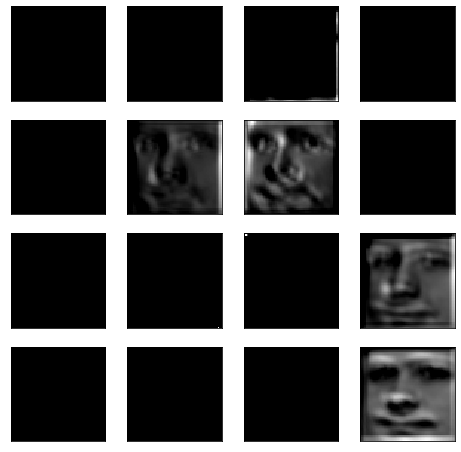

In [88]:
FeatureMaps(conv_output)

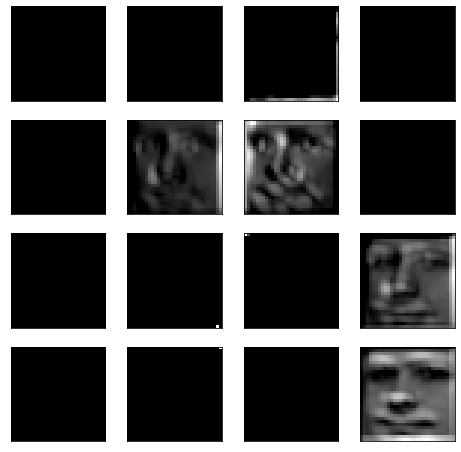

In [89]:
FeatureMaps(pooling_output)

Model1 with less filter gave better predictions on test set

### 11) Optimize the neural network to improve the accuracy on the test set. You should try to get a better accuracy than both of the previous models.  Consider changing the following, then print the accuracy on the test set: (15 pts)
Number of convolutional and pooling layers,
Number of filters in the convolutional layer,
Window size,
Number of fully connected layers and neurons,
Regularization (L1/L2 penalty, dropout, early stopping),
Number of epochs and batch size

In [97]:
model3 = Sequential()
model3.add(Conv2D(8, kernel_size=3, activation='relu',
                 padding='same', input_shape=(64,64,1)))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model3.add(Conv2D(8, kernel_size=3, activation='relu',
                 padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model3.add(Flatten())
model3.add(Dense(40, activation='softmax'))
model3.summary()
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model3.fit(X_train, y_train,
           epochs=20, batch_size=10,
           validation_data=(X_test, y_test))
model3.evaluate(X_test, y_test)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 64, 64, 8)         80        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 40)                81960     
Total params: 82,624
Trainable params: 82,624
Non-trainable params: 0
_________________________________________________

[0.2673743426799774, 0.95]

### 12) Write a few sentences describing how you optimized the model in (11). What worked well? (5 pts)

Initially I tried add another pair of convolutional and pooling layers to make the network structure following small (4) to large (8) filters. I prefer to keep the other parameters as the same as previous models, based on the experience during online classes and nn homework. However, the result was worse. Eventually, I simply duplicated convolutional and pooling layers with same number of filters (8), and achieved a better model.